# HW02
Deep Learning, GIST RT5101-01, 2024, Spring, (Tue/Thurs 2:30~3:45)
***

### Problem1. Fully Connected Layer vs Convolution Neural Network
- Build your custom CNN model
- Check the result CNN has better result than FCN
- The test accuracy must bigger than 60%

----

### Problem2. Train Dogs and Cats data via CNN
- Understand the process of training the CNN model with custom dataloader.   
(Download URL: https://www.kaggle.com/c/dogs-vs-cats)
- Check the result
- The test accuracy must bigger than 60%

***
### You can add additional code for checking your image and model.
### You must summit ``.ipynb`` file. Do not summit ``.py`` file.
---

### How to submit your homework
Submit your jupyter notebook file with the filename of  *HW02_studentnumber.ipynb*  on GEL

Ex) HW02_20222015.ipynb  

### Submission deadline
2024.06.16, Sunday 23:59 (PM)

### Plagiarism
We encourage you to discuss this homework with your friends or TA, but you should write your own code.




***
***

## Problem 1. (total 10 pt.)
- **Fully Connected Layer vs Convolution Neural Network**
- We will use cifar10 dataset.
- You have to compare with HW1 result and check CNN model has better result.
- The test accuracy of CNN model must bigger than 60%.   
- Reference : https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

### Problem 1-1. (2 pt.)
- **Step 1**. Import package.  
- **Step 2**. Define device and configure hyperparameters.  
- **Step 3**. Download then load Cifar10 dataset to dataloader. You have to adjust transform.   

In [9]:
''' Step 1 '''
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

lr = 1e-4
num_classes = 10
batch_size = 32
epochs = 20

In [3]:
def dataset(is_train):

    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5,0.5, 0.5))])

    dataset = torchvision.datasets.CIFAR10(root='./data',train=is_train,download=True,transform=transform)


    return dataset

train_dataset = dataset(is_train=True)
val_dataset = dataset(is_train=False)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                         shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


### Problem 1-2. (5 pt.)
- **Step 1**. Build your CNN model.  
- **Step 2**. Configure optimizer and objective function.  

In [4]:
''' Step 1 '''
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1) 
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1) 
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #3*32*32 -> 32*32*32 -> 32*16*16
        x = self.pool(F.relu(self.conv2(x))) #32*16*16 -> 64*16*16 -> 64*8*8
        x = self.pool(F.relu(self.conv3(x))) #64*8*8 -> 128*8*8-> 128*4*4
        x = x.view(-1, 128 * 4 * 4)
        x = F.relu(self.fc1(x)) #fully conneted layer
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
''' Step 2 '''
model = CNN()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr)
criterion = nn.CrossEntropyLoss().to(device)

### Problem 1-3. (3 pt.)
- **Step 1**. The method for model training
- **Step 2**. The method for testing model
- **Step 3**. Train the model and check the test results
- **Step 4**. Check the output after training

In [6]:
''' Step 1 '''
def train():
    for epoch in range (epochs):
        model.train()
        running_loss=0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.to(device))
            loss = criterion(outputs, labels.to(device))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

In [7]:
''' Step 2 '''
def test():
    model.eval()
    with torch.no_grad():
        total = 0.0
        correct = 0.0
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Test Accuracy: {(correct/total)*100:.2f}%")

In [8]:
''' Step 3 '''
train()

test()

Epoch 1/20, Loss: 1.6637755293382412
Epoch 2/20, Loss: 1.3489825763690189
Epoch 3/20, Loss: 1.2026023123024827
Epoch 4/20, Loss: 1.0762638144590728
Epoch 5/20, Loss: 0.9857321581395101
Epoch 6/20, Loss: 0.90599033211716
Epoch 7/20, Loss: 0.8402456977355198
Epoch 8/20, Loss: 0.7806800367526343
Epoch 9/20, Loss: 0.7251706202672371
Epoch 10/20, Loss: 0.671200913873454
Epoch 11/20, Loss: 0.6229290161198404
Epoch 12/20, Loss: 0.5718038650712216
Epoch 13/20, Loss: 0.5230297855436993
Epoch 14/20, Loss: 0.4753837842668239
Epoch 15/20, Loss: 0.4276789001076556
Epoch 16/20, Loss: 0.38656894990879986
Epoch 17/20, Loss: 0.34072430485708166
Epoch 18/20, Loss: 0.2988780691352168
Epoch 19/20, Loss: 0.260022335745971
Epoch 20/20, Loss: 0.21970821636289797
Test Accuracy: 74.39%


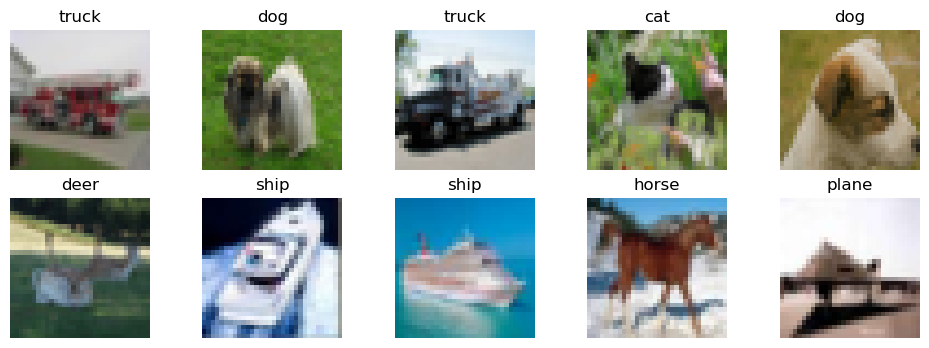

In [11]:
# CIFAR-10 클래스 이름
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def visualize_samples(dataset, num_samples=10):
    # 데이터 로더 생성
    data_loader = torch.utils.data.DataLoader(dataset, batch_size=num_samples, shuffle=True)
    
    # 하나의 배치를 가져옴
    data_iter = iter(data_loader)
    images, labels = next(data_iter)
    
    # 이미지와 라벨을 시각화
    plt.figure(figsize=(12, 4))
    for i in range(num_samples):
        img = images[i] / 2 + 0.5  # 정규화 해제
        np_img = img.numpy()
        
        plt.subplot(2, 5, i+1)
        plt.imshow(np.transpose(np_img, (1, 2, 0)))
        plt.title(classes[labels[i].item()])
        plt.axis('off')
    plt.show()

# CIFAR-10 데이터셋을 사용한 시각화
visualize_samples(val_dataset)

---
---

## Problem 2. (Total 10 pt.)
- **Train Dogs and Cats data via CNN**
- **You must set the class that Dogs are 0 and Cats are 1.**
- Understand the process of training the CNN model with custom dataloader.
- Download the dataset from below.   
https://www.kaggle.com/c/dogs-vs-cats
- The test accuracy of CNN model must bigger than 60%.   

### Problem 2-1. (4 pt.)
- **Step 1**. Import package.  
- **Step 2**. Define device and configure hyperparameters.  
- **Step 3**. Load **Dogs and Cats** dataset to dataloader. You have to adjust transform.  
**You can label dataset via images name at train folder.**

In [1]:
''' Step 1 '''
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.model_selection import train_test_split

In [2]:
''' Step 2 '''
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

lr = 1e-4
num_classes = 2
batch_size = 32
epochs = 30

In [3]:
''' Step 3 '''
transform = transforms.Compose([
    #이미지 크기 조정
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, img_labels, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = img_labels
        
    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.img_labels[idx])
        image = Image.open(img_name).convert("RGB")
        
        if self.transform:
            image = self.transform(image)
        
        
        label = 0 if 'cat' in img_name else 1
        
        return image, label

# 파이썬 파일이 있는 폴더 내부에 data라는 폴더를 만들고 그 안에 데이터를 저장했습니다.
train_dir = './data/train'
test_dir = './data/test1'

all_img_labels = [img for img in os.listdir(train_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]

#sklearn의 split 함수로 valid set을 만들어준다.
train_labels, val_labels = train_test_split(all_img_labels, test_size=0.2, random_state=42)

# 데이터셋 생성
train_dataset = CustomImageDataset(img_dir=train_dir, img_labels=train_labels, transform=transform)
val_dataset = CustomImageDataset(img_dir=train_dir, img_labels=val_labels, transform=transform)
test_dataset = CustomImageDataset(img_dir=test_dir, img_labels=os.listdir(test_dir), transform=transform)

# DataLoaders 생성
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

### Problem 2-2. (3 pt.)
- **Step 1**. Build your CNN model.  
(It doesn't matter if you use same model at problem 1.)
- **Step 2**. Configure optimizer and objective function.

In [7]:
''' Step 1 '''
# 1번 문제에서 사용한 모델보다 convolution layer를 2개 추가해줬다.
# 별도의 weight는 진행하지 않았다. kaiming intialization을 사용했었는데 오히려 acc가 낮아졌다.
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv5 = nn.Conv2d(256, 512, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(512 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, num_classes)
        self.dropout = nn.Dropout(0.5)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #3*128*128 -> 32*128*128 -> 32*64*64
        x = self.pool(F.relu(self.conv2(x))) #32*64*64 -> 64*64*64 -> 64*32*32
        x = self.pool(F.relu(self.conv3(x))) #64*32*32 -> 128*32*32 -> 128*16*16
        x = self.pool(F.relu(self.conv4(x))) #128*16*16 -> 256*16*16 -> 256*8*8
        x = self.pool(F.relu(self.conv5(x))) #256*8*8 -> 512*8*8 -> 512*4*4
        x = x.view(-1, 512 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [8]:
''' Step 2 '''
model = CNN()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr)
criterion = nn.CrossEntropyLoss().to(device)

### Problem 2-3. (3 pt.)
- **Step 1**. The method for model training
- **Step 2**. The method for validation model
- **Step 3**. Train the model and check the validation results
- **Step 4**. Check the test result by **ten** samples with image

In [9]:
def train():
    for epoch in range (epochs):
        model.train()
        running_loss=0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.to(device))
            loss = criterion(outputs, labels.to(device))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

In [10]:
''' Step 2 '''
def test():
    model.eval()
    with torch.no_grad():
        total = 0.0
        correct = 0.0
        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Validation Accuracy: {(correct/total)*100:.2f}%")

In [11]:
''' Step 3 '''
#훈련과 테스트
train()

test()

Epoch 1/30, Loss: 0.6452994408130646
Epoch 2/30, Loss: 0.5132355678319931
Epoch 3/30, Loss: 0.4188817711353302
Epoch 4/30, Loss: 0.3473297087430954
Epoch 5/30, Loss: 0.2828129555344582
Epoch 6/30, Loss: 0.23366276782751083
Epoch 7/30, Loss: 0.18047457896471022
Epoch 8/30, Loss: 0.13635148356556892
Epoch 9/30, Loss: 0.09635465395152569
Epoch 10/30, Loss: 0.06295905196294188
Epoch 11/30, Loss: 0.05110776615031064
Epoch 12/30, Loss: 0.029724313204176723
Epoch 13/30, Loss: 0.032664551656413826
Epoch 14/30, Loss: 0.029769077100325374
Epoch 15/30, Loss: 0.024869750462076626
Epoch 16/30, Loss: 0.023254866183409467
Epoch 17/30, Loss: 0.019500763612333685
Epoch 18/30, Loss: 0.017253791577060473
Epoch 19/30, Loss: 0.023920282611390575
Epoch 20/30, Loss: 0.014292268596356735
Epoch 21/30, Loss: 0.015844571307580917
Epoch 22/30, Loss: 0.01623243328530807
Epoch 23/30, Loss: 0.017120740263586048
Epoch 24/30, Loss: 0.012470433021569624
Epoch 25/30, Loss: 0.01570728020582537
Epoch 26/30, Loss: 0.011994

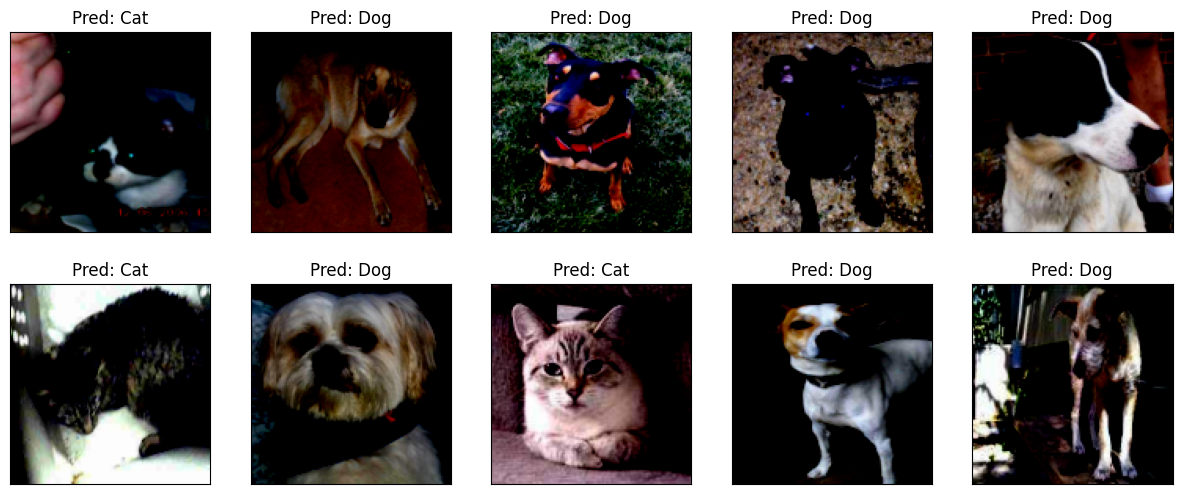

In [12]:
''' Step 4 '''
CnD_test_path = test_dir

model.eval()
test_images, test_labels = next(iter(test_loader))
test_images, test_labels = test_images.to(device), test_labels.to(device)
outputs = model(test_images)
_, predicted = torch.max(outputs.data, 1)

# 이미지와 레이블 출력
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15, 6))
for i in range(10):
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    img = test_images[i].cpu().numpy().transpose((1, 2, 0))
    img = np.clip(img, 0, 1)
    ax.imshow(img)
    ax.set_title(f'Pred: {"Cat" if predicted[i] == 0 else "Dog"}')

plt.show()